In [29]:
import numpy as np
import torch
# from pytorch_lightning import LightningModule
# import src.utils as utils
from pathlib import Path
# /home/kan/ML_application/s4/outputs/2025-04-21/11-19-18/checkpoints/
torch.set_printoptions(
    threshold=float('inf'),      # すべての要素を表示
    precision=10,                # 小数点以下10桁まで表示
    linewidth=10**4              # 1行に表示する文字数（折り返し防止）
)
%matplotlib inline
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig_size_horizontal=15

In [32]:
base_dir = "/home/kan/ML_application/s4/outputs/"
max_depth = 2
base_dir_ = Path(base_dir)

dt = [0.1, 1][0]
n_layer = 6
data_dict={}
for file in base_dir_.glob("*/*/checkpoints/*"):
    if file.is_file():
        parent_path = file.parents[1]
        print("parent_path",parent_path)
        print("file",file)
        ckpt = torch.load(file, map_location='cpu')
        # print(ckpt.keys())
        state_dict = ckpt['state_dict']
        # print(state_dict.keys())
        
        # for key in state_dict.keys():
        #     print(key)
        lams_arr = []
        for rep_layer in range(n_layer):
            print("rep_layer", rep_layer)
            log_dt = state_dict["model.layers.%d.layer.kernel.kernel.log_dt"%rep_layer]
            log_w_real = state_dict["model.layers.%d.layer.kernel.kernel.log_w_real"%rep_layer]
            w_imag = state_dict["model.layers.%d.layer.kernel.kernel.w_imag"%rep_layer]
            dts = torch.exp(log_dt) # (H)
            # print("dts", dts.shape)
            # print(dts)
            mindt, maxdt, meandt=torch.min(dts), torch.max(dts), torch.mean(dts)
            print("dts",mindt, maxdt, meandt)
            
            w_real = -torch.exp(log_w_real)
            print("w_real", w_real.shape)
            print("w_imag", w_imag.shape)
            w = w_real + 1j * w_imag
            print("w",w)
            
            dtA = w*dt
            A = torch.exp(dtA)[0] # (H N)
            print("A", A.shape, A)
            lams_arr.append(A)
            rho = torch.max(torch.abs(A))
            print("rho", rho)
            # w *= rho/np.max(np.abs(lams))
            # dtA = w * dts.unsqueeze(-1)  # (H N)
            # A = torch.exp(dtA) # (H N)
        data_dict[file] = lams_arr
        
        break


parent_path /home/kan/ML_application/s4/outputs/2025-04-20/22-59-56
file /home/kan/ML_application/s4/outputs/2025-04-20/22-59-56/checkpoints/last.ckpt
rep_layer 0
dts tensor(0.0008363356) tensor(0.1080858037) tensor(0.0236685127)
w_real torch.Size([1, 32])
w_imag torch.Size([1, 32])
w tensor([[-0.5188314319-0.3274896741j, -0.6834538579+2.8325977325j, -0.3658790886+6.2659988403j, -0.5555512905+9.3964262009j, -0.6051408052+12.4749526978j, -0.8017402291+15.9803285599j, -0.5485979319+18.9031085968j, -0.5719980001+22.0852603912j, -0.3749741018+24.9672355652j, -0.7266177535+28.3436183929j, -0.3664407730+31.4563388824j, -0.3907284737+34.6751976013j, -0.4592149258+37.6902656555j, -1.1481548548+40.5912704468j, -0.4503176212+44.2528305054j, -0.5130112171+47.1589241028j, -0.4871275127+50.1216964722j, -0.6218275428+53.5368881226j, -0.6682295799+56.5719375610j, -0.5283705592+59.7259216309j, -0.6578546762+62.7857246399j, -0.4822469056+65.6017303467j, -0.7506361008+68.7658996582j, -0.5287688971+72.65

/home/kan/ML_application/s4/outputs/2025-04-20/22-59-56/checkpoints/last.ckpt [tensor([ 0.9489307404-0.0310876165j,  0.8967199326+0.2610234916j,  0.7809244990+0.5653268695j,  0.5581887960+0.7637181282j,  0.2990432084+0.8925145268j, -0.0251349825+0.9226133823j, -0.2973380685+0.8987076283j, -0.5622734427+0.7587819695j, -0.7697663307+0.5789716840j, -0.8863716722+0.2812252939j, -0.9640113115-0.0038958630j, -0.9110522866-0.3079178333j, -0.7732021809-0.5607198477j, -0.5418542624-0.7079694867j, -0.2707087696-0.9168369174j,  0.0033281348-0.9499866962j,  0.2812702060-0.9099763632j,  0.5621703863-0.7530083060j,  0.7580000162-0.5480290055j,  0.9031495452-0.2898942232j,  0.9363217950-0.0043190466j,  0.9165977240+0.2605848610j,  0.7690889239+0.5187492371j,  0.5263328552+0.7890626788j,  0.2959049940+0.9023980498j, -0.0149103208+0.9349848628j, -0.2806740701+0.8879279494j, -0.5696185231+0.7432993650j, -0.7645583153+0.5499478579j, -0.8699957728+0.3085864186j, -0.9098899364-0.0153708719j, -0.8642609119-

/root/.pyenv/versions/3.8.20/lib/python3.8/site-packages/torch/_tensor.py:958: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


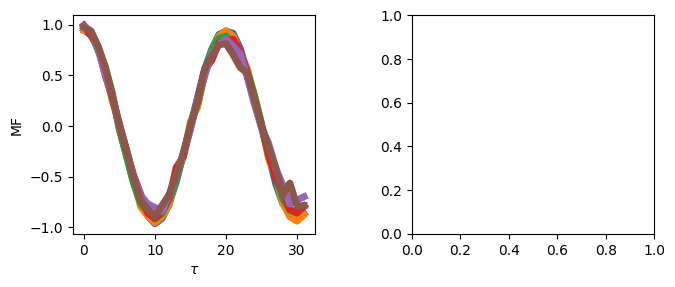

<Figure size 1000x600 with 0 Axes>

In [34]:
nrows, ncols = 1, 2
axis_wide, axis_high = 8.0, 6.0
fig_ratio = 1/2
wspace, hspace = 0.4, 0.35
fig_wide = ncols*(axis_wide+wspace)
fig_high = nrows*(axis_high+hspace)
fig_wide_size = fig_size_horizontal*fig_ratio
fig_high_size = fig_size_horizontal*fig_ratio*fig_high/fig_wide
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, 
                    figsize = (fig_wide_size, fig_high_size)
                    )#, subplot_kw=dict(projection="polar"))
fig.subplots_adjust(wspace=wspace, hspace=hspace)
# plt.suptitle(lam_name, x=0.5, y=0.98, fontsize=20)
plt.figure(figsize=(10, 6))
# axid.set_title('%s'%(noisename_plot), x= -0.5, y=0.5, )
# taus = np.arange(MFs_num.shape[0])

for rep, (key, lams_arr) in enumerate(data_dict.items()):
    print(key, lams_arr)
    axid = ax[0]
    axid.set_xlabel(r'$\tau$')
    # axid.set_ylim(-10**3, 10**3)
    # axid.set_ylim(-0, 1.1)
    # axid.set_yticks([0, 0.5, 1.0])
    axid.set_ylabel('MF')
    for rep_layer in range(n_layer):
        lams = lams_arr[rep_layer]
        print(lams)
        axid.plot(
            lams,
            # label="num", #+ noisename,
            lw=5
            )

# Experiments that do not work

In [27]:
import torch, wandb
import numpy as np
np.set_printoptions(threshold=np.inf, precision=10, linewidth=10**4)
torch.set_printoptions(threshold=np.inf, precision=10, linewidth=10**4)
api = wandb.Api()
print(api)

project_name = 'hippo'
run_id = wandb.run.id  # 現在のランIDを取得
print(run_id)

runs = api.runs(project_name)
print(runs)

for idx, run in enumerate(runs):
    print(idx, run.id)
    print(run)
    metrics = run.history()
    # for rep, met in enumerate(metrics):
    #     print(met)
    
    artifacts = run.logged_artifacts()  # ランに関連する全てのアーティファクト
    for artifact in artifacts:
        print(artifact)
        if 'model' in artifact.name.lower():  # モデルアーティファクトを特定する
            print(f"Artifact Name: {artifact.name}")
            print(f"Artifact Type: {artifact.type}")
            print(f"Artifact Metadata: {artifact.metadata}")  # メタデータにモデルに関する情報が含まれていることがあります
    if idx==2:
        break

# run = api.run("ユーザー名/プロジェクト名/ランID")
# artifact = run.use_artifact("モデル名:latest") #（例：last.ckpt）
# artifact_dir = artifact.download()

# model = MyModel.load_from_checkpoint(artifact_dir + "/last.ckpt") # モデル読み込み（Lightningなど使ってるなら）

x2hzde8t
<Runs jingchuan0guan-the-university-of-tokyo-hospital/hippo>
0 bxdoprfi
<Run jingchuan0guan-the-university-of-tokyo-hospital/hippo/bxdoprfi (finished)>
<Artifact QXJ0aWZhY3Q6MTU4MjYzMzQyOQ==>
1 wxox9i81
<Run jingchuan0guan-the-university-of-tokyo-hospital/hippo/wxox9i81 (finished)>
<Artifact QXJ0aWZhY3Q6MTY0NTIxMTYzMQ==>
2 u4c4hkof
<Run jingchuan0guan-the-university-of-tokyo-hospital/hippo/u4c4hkof (finished)>
<Artifact QXJ0aWZhY3Q6MTY0OTMyOTU1MQ==>


In [ ]:
# @hydra.main(config_path="./configs/model/", config_name="s4d", version_base=None)
# def get_model(model_config: DictConfig):
#     print(model_config)  # DictConfigとしてアクセス可能
#     for key in model_config.keys():
#         print(key, model_config[key])
#     model = utils.instantiate(registry.model, model_config)#.load_from_checkpoint("path/to/model.ckpt")
#     print(model)
    
#     state_dict = model.state_dict()
#     for k, v in state_dict.items():
#         print(k, v.shape)

# import sys
# sys.path.append('/home/kan/ML_application/s4/src')
# layer_key = ["s4d", ][0]
# print(registry.model["model"])
# print(registry.layer[layer_key])
# print(registry.model["model"](layer=registry.layer[layer_key]))
# ckpt ファイルをロード
# model = utils.instantiate(registry.model, layer="s4d", )
# registry.model["model"](layer=layer).load_from_checkpoint("path/to/model.ckpt")

# for root, dirs, files in os.walk(base_dir):
#     # 今の階層の深さを数える
#     depth = root[len(base_dir):].count(os.sep)
#     print(depth)
#     if depth > max_depth:
#         # さらに深い階層の探索をやめる
#         dirs[:] = []
#         continue

#     for file in files:
#         print(os.path.join(root, file))

In [ ]:
from pytorch_lightning import LightningModule
# import src.utils as utils
from pathlib import Path

import hydra
from hydra import initialize, compose
from omegaconf import DictConfig, OmegaConf
# from hydra.utils import instantiate

from src.utils import registry, instantiate

def check_model(model_name="model", cfg_name="config", cfg_path="./configs/model/",  model_path="", ):
    with initialize(config_path=cfg_path):
        cfg = compose(config_name=cfg_name)
    print("cfg", cfg)
    OmegaConf.set_struct(cfg, False)
    # cfg.model._target_ = "torch.nn.Identity" 
    ModelClass = hydra.utils.get_class(registry.model[model_name])
    # model = ModelClass(cfg)
    
    # model = instantiate(cfg.model) # registry.model,
    model = instantiate(registry.model, cfg) # モデル構造のインスタンス化（この時点でランダム初期化）
    print(model)
    print("type", type(model))
    ckpt = torch.load(model_path, map_location="cpu")# チェックポイントからstate_dictを読み込み
    # state_dict = {k.replace("model.", ""): v for k, v in ckpt["state_dict"].items()}
    # model.load_state_dict(state_dict)
    print("Checkpoint keys:", ckpt.keys())  # 追加
    
    state_dict = ckpt.get("state_dict", ckpt)
    model.load_state_dict(state_dict)
    # if "state_dict" in ckpt:
    #     state_dict = ckpt["state_dict"]
    # else:
    #     state_dict = ckpt
    # model.load_state_dict(state_dict)
    
    # for key in cfg.keys():
    #     print(key, cfg[key])
    # model = utils.instantiate(registry.model, cfg).load_from_checkpoint(model_path)

    print(model)
    
# /home/kan/ML_application/s4/outputs/2025-04-21/11-19-18/checkpoints/

base_dir = "/home/kan/ML_application/s4/outputs/"
max_depth = 2

base_dir_ = Path(base_dir)
for file in base_dir_.glob("*/*/checkpoints/*"):
    if file.is_file():
        parent_path = file.parents[1]
        print(parent_path)
        print(file)
        relative_path = parent_path.parts[parent_path.parts.index("outputs"):]  # s4 以降の部分を抽出
        cfg_path = "/".join(relative_path)+ "/.hydra"
        print(cfg_path)
        check_model(model_name="model", cfg_path=cfg_path, model_path=file)


/home/kan/ML_application/s4/outputs/2025-04-20/22-59-56
/home/kan/ML_application/s4/outputs/2025-04-20/22-59-56/checkpoints/last.ckpt
outputs/2025-04-20/22-59-56/.hydra
cfg {'train': {'seed': 0, 'interval': 'epoch', 'monitor': 'val/accuracy', 'mode': 'max', 'ema': 0.0, 'test': False, 'debug': False, 'ignore_warnings': False, 'state': {'mode': None, 'chunk_len': None, 'overlap_len': None, 'n_context': 0, 'n_context_eval': '${.n_context}'}, 'sweep': None, 'group': None, 'benchmark_step': False, 'benchmark_step_k': 1, 'benchmark_step_T': 1, 'checkpoint_path': None, 'visualizer': 'filters', 'disable_dataset': False}, 'wandb': {'project': 'hippo', 'group': '', 'job_type': 'training', 'mode': 'online', 'save_dir': None, 'id': None}, 'trainer': {'accelerator': 'cuda', 'devices': [0, 1, 2, 3, 4, 5, 6, 7], 'accumulate_grad_batches': 1, 'max_epochs': 100, 'gradient_clip_val': 0.0, 'log_every_n_steps': 10, 'limit_train_batches': 1.0, 'limit_val_batches': 1.0, 'enable_progress_bar': True}, 'loader

/tmp/ipykernel_649803/159137829.py:14: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize(config_path=cfg_path):


InstantiationException: Cannot instantiate config of type type.
Top level config must be an OmegaConf DictConfig/ListConfig object,
a plain dict/list, or a Structured Config class or instance.